In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [17]:
data_diabetes = pd.read_csv("diabetes.csv")

train_set, test_set, train_labels, test_labels = train_test_split(
    data_diabetes.values[:, :-1], data_diabetes.values[:, -1], train_size=0.7, random_state=278805)


In [18]:
scaler = StandardScaler()

scaler.fit(train_set)

train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

In [19]:
mlp1 = MLPClassifier(hidden_layer_sizes=(
    6, 3), random_state=1, max_iter=500, activation='relu')

mlp1.fit(train_set, train_labels)

predictions_test = mlp1.predict(test_set)
print(
    f"Test accuracy: {np.round(accuracy_score(predictions_test, test_labels) * 100, 2)}%")


Test accuracy: 76.19%


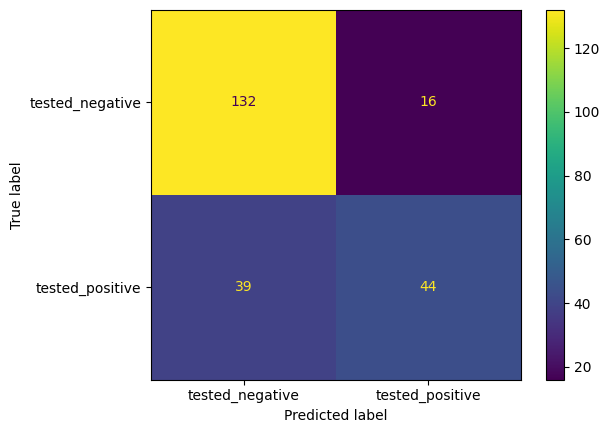

In [20]:
cm = confusion_matrix(test_labels, predictions_test)
display = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=mlp1.classes_)
display.plot()